In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import HTC

In [3]:
# load connectome
# this is the original one, unmodified
W66=np.loadtxt("../Data/connectivity_matrix/weights.txt")

In [4]:
#create brain object for all simulation fixed parameters
brain=HTC.Brain()

n_neurons=brain.connectome(W66, normalize=False)

brain.set_netowrk_parameters(r1=2/n_neurons,
                             r2=(2/n_neurons)**0.2)

Connectome loaded but not yet normalized
r1 and r2 parameters now set successfully


In [5]:
attempts=[0,20]#,70]#,100,200,500,700]

In [6]:
w_new=HTC.modify_connectome(W66, attempts=attempts)

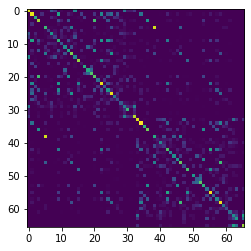

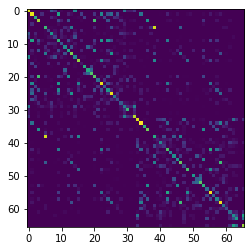

In [7]:
for i,j in enumerate(attempts[0:2]):
    plt.figure()
#     plt.hist(w_new[i].flatten(), bins=50, log=True, range=(0,0.6),density=True, label=i)
    plt.imshow(w_new[i], label=i)
    #plt.legend()
    #plt.show()

In [8]:
#constants of the simulation
active_frac=0.1 #Initial fraction of active neurons
n_runs=100 #Parallel runs
tmin=0.01 #Min tc
tmax=0.3 #Max tc
delta_tc=0.01 #Variation of tc
dt=0.1 #Time step
n_timesteps=6000 #Total number of timesteps
s_step=10 #Campute s1 s2 every s_step (to speed up computing time)
compute_s1_s2=False 
compute_s_distrib=False
compute_fc=True

In [9]:
#container of all simulations
output=[dict() for i in attempts]
output

[{}, {}]

In [10]:
for i in range(len(attempts)):
    brain.connectome(w_new[i], normalize=True)
    output[i]=brain.simulation(active_frac=active_frac, n_runs=n_runs,
                      tmin=tmin, tmax=tmax, delta_tc=delta_tc,
                      dt=dt, n_timesteps=n_timesteps,
                      compute_s1_s2=compute_s1_s2, s_step=s_step,
                      compute_s_distrib=compute_s_distrib, tc_distrib=0.15,
                      compute_fc=compute_fc)

Connectome of shape (66, 66) now loaded and normalized successfully


SystemError: CPUDispatcher(<function update_states at 0x7f11f81600d0>) returned a result with an error set

In [ ]:
# simulation with different weights added
fig,ax=plt.subplots(1,2,figsize=(10,5))
for i in range(len(attempts)):
    ax[0].plot(output[i]['tc'], output[i]['activity'], label='weights:'+str(attempts[i]))
    ax[0].set_title('A')
    ax[0].legend()
    ax[1].plot(output[i]['tc'], output[i]['sigma_activity'], label='weights:'+str(attempts[i]))
    ax[1].legend()
    ax[1].set_title('sigmaA')

plt.show()

In [ ]:
rho,chi = HTC.rho_chi_added_weights( output, 'set')
fig, ax=plt.subplots(1,2, figsize=(15,5))

for i in range(len(rho)):
    ax[0].plot(output[0]['tc'],rho[i], label='add: '+str(attempts[i]))
    ax[0].legend()
    ax[1].plot(output[0]['tc'],chi[i], label='add: '+str(attempts[i]))
    ax[1].legend()
ax[0].set_title('Rho at different added weights')
plt.show()

In [ ]:
fc_emp=HTC.fc_empirical()

fc_emp_z=HTC.remove_zeroes(fc_emp)

fig, ax=plt.subplots(1,3,figsize=(15,5))

ax[0].imshow(HTC.remove_zeroes(output[0]['fc'][14]))
ax[0].set_title('Normalized,Add 10 weights @ tc=%.2f'%output[0]['tc'][14])
ax[1].imshow(HTC.remove_zeroes(output[0]['fc'][14]))
ax[1].set_title('Normalized,Add '+str(attempts[0])+' weights @ tc=%.2f'%output[0]['tc'][14])
ax[2].imshow(fc_emp_z)
ax[2].set_title('Empirical')
plt.show()